In [1]:
import sys
sys.path.append('..')

import importlib
import matplotlib.pyplot as plt
import numpy as np
import polars as pl
from sklearn.datasets import make_blobs

plt.style.use('astroLuSt.styles.LuSt_style')


from astroLuSt.visualization import plots as alvp

# Parallel Coordinate Plot

Generate a dummy dataset

In [652]:
nsamples = 100

id = np.random.choice(['A', 'B', 'C', 'D'], size=(nsamples,1))
x1 = np.random.rand(*(nsamples,1))
x2 = np.random.randint(50, 10000, (nsamples,1), dtype=int)
x3 = np.random.choice(['a', 'relu', 'sigmoid', 'tanh', np.nan], size=(nsamples,1))
x4 = np.random.randint(-2, 8, (nsamples,1), dtype=int).astype(float)
score = np.random.uniform(0, 100, (nsamples,1))
score[:2]   = np.nan
score[2:3]  = np.inf
score[3:4]  = -np.inf
score[5:7]  = 0
score[7:10] = -1
x4[8]       = np.nan
# score = np.random.uniform(0.3, 0.8, (nsamples,1))
X = {
    '#':id.flatten(),
    'x1':x1.flatten(),
    'x2':x2.flatten(),
    'x3':x3.flatten(),
    'x4':x4.flatten(),
    'score':score.flatten(),
    # 'acc':score.flatten(),
}

df = pl.DataFrame(data=X)
print(df)

df_np = df.select(pl.col(['x2', 'x1', 'x3', 'x4', 'score'])).to_numpy()
# df_np = df.select(pl.col(['x2', 'x3', 'x4', 'score', 'x1'])).to_numpy()

print(df_np)


shape: (100, 6)
┌─────┬──────────┬──────┬─────────┬─────┬───────────┐
│ #   ┆ x1       ┆ x2   ┆ x3      ┆ x4  ┆ score     │
│ --- ┆ ---      ┆ ---  ┆ ---     ┆ --- ┆ ---       │
│ str ┆ f64      ┆ i64  ┆ str     ┆ f64 ┆ f64       │
╞═════╪══════════╪══════╪═════════╪═════╪═══════════╡
│ C   ┆ 0.555471 ┆ 8315 ┆ relu    ┆ 7.0 ┆ NaN       │
│ B   ┆ 0.389231 ┆ 2611 ┆ sigmoid ┆ 6.0 ┆ NaN       │
│ A   ┆ 0.609138 ┆ 6323 ┆ tanh    ┆ 2.0 ┆ inf       │
│ B   ┆ 0.10859  ┆ 7620 ┆ tanh    ┆ 2.0 ┆ -inf      │
│ …   ┆ …        ┆ …    ┆ …       ┆ …   ┆ …         │
│ A   ┆ 0.786623 ┆ 530  ┆ a       ┆ 0.0 ┆ 72.239061 │
│ C   ┆ 0.587503 ┆ 203  ┆ nan     ┆ 4.0 ┆ 31.580573 │
│ A   ┆ 0.150995 ┆ 3720 ┆ sigmoid ┆ 2.0 ┆ 0.406866  │
│ A   ┆ 0.082878 ┆ 3889 ┆ nan     ┆ 0.0 ┆ 27.316234 │
└─────┴──────────┴──────┴─────────┴─────┴───────────┘
[[8315 0.5554709358286337 'relu' 7.0 nan]
 [2611 0.3892308785102304 'sigmoid' 6.0 nan]
 [6323 0.6091377085441559 'tanh' 2.0 inf]
 [7620 0.10858973978452102 'tanh' 2.0 -inf]
 

Let's look at the different features/coordinates

WARNING(plot): `len(coordnames)` has to be the same as `X.shape[1]`. Adding autogenerated labels to ensure correct length!


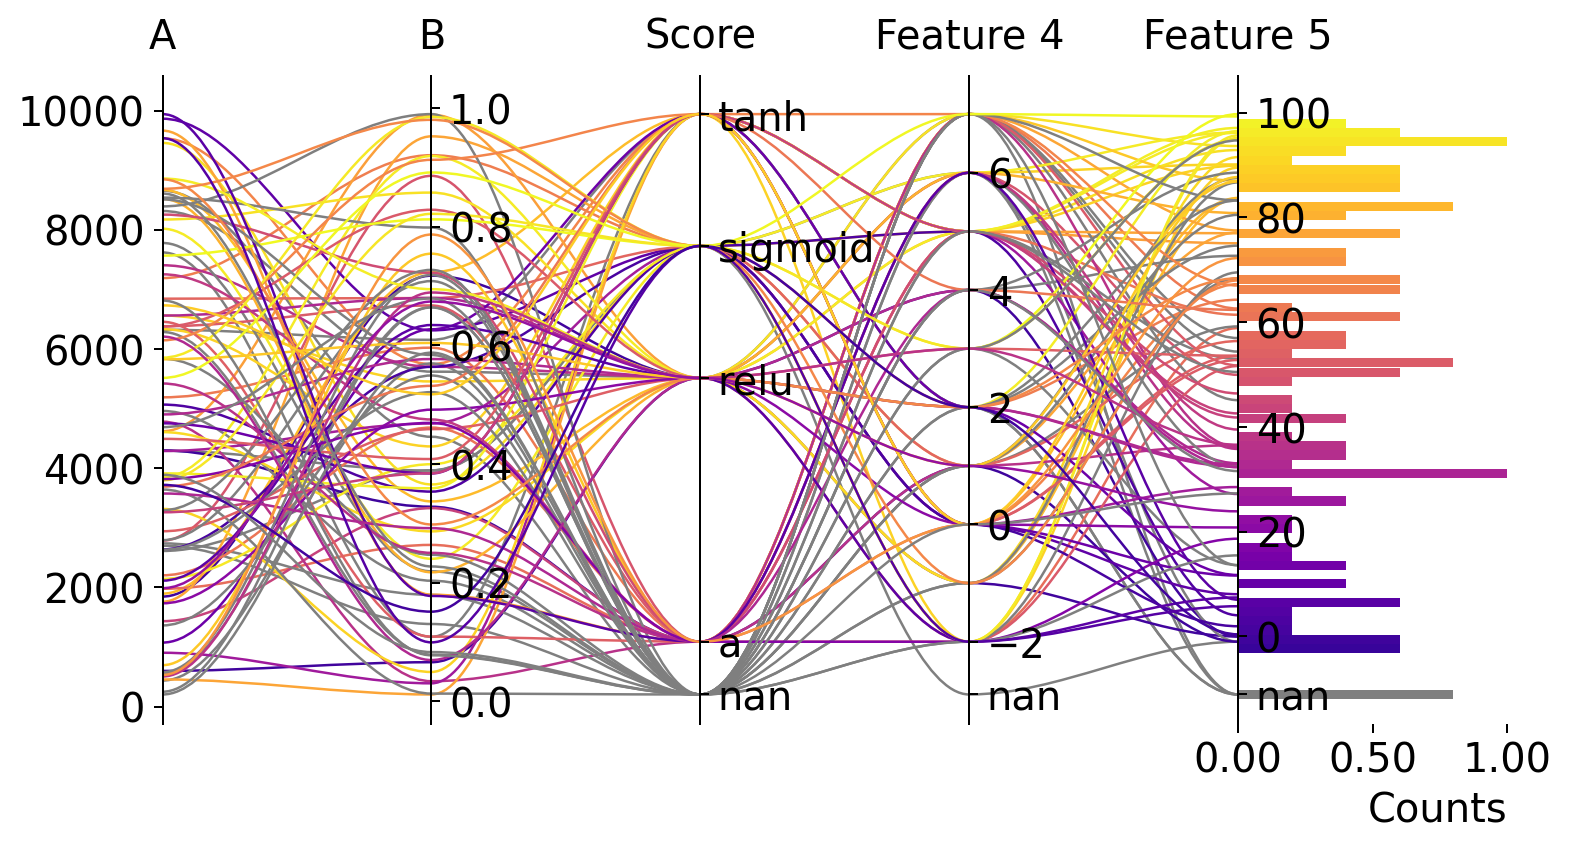

In [663]:
importlib.reload(alvp)


PC = alvp.ParallelCoordinates(
    show_idcol=True,
    interpkind='quadratic',
    # interpkind=1,
    res=100,
    axpos_coord=None, axpos_hist=None,
    map_suffix='__map__',
    ticks2display=5, tickcolor='tab:grey', ticklabelrotation=45, tickformat='%g',
    nancolor='tab:grey', nanfrac=4/256,
    linealpha=1, linewidth=1,
    base_cmap='plasma', cbar_over_hist=False,
    sleep=0.1,
    verbose=3,
    text_kwargs=None,    
)
# print(PC)
# fig, axs = PC.plot(
#     coordinates=df,
#     id_col='#',
#     score_col='score',
#     # score_col='acc',
#     coords_cols=r'^.*$',
#     min_score=None, max_score=None, remove_nanscore=False,
#     # score_scaling='np.log10(pl.col(score_col))',
#     score_scaling='pl.col(score_col)',
#     show_idcol=None,
#     interpkind=None,
#     res=None,
#     axpos_coord=None, axpos_hist=None,
#     ticks2display=None, tickcolor=None, ticklabelrotation=None, tickformat=None,
#     # coordinate_labs=['0', '1', '2', '3', '4'],
#     nancolor=None, nanfrac=None,
#     linealpha=None, linewidth=None,
#     base_cmap=None, cbar_over_hist=None,
#     n_jobs=None, n_jobs_addaxes=None, sleep=None,
#     map_suffix=None,
#     save=False,
#     max_nretries=4,
#     verbose=None,
#     text_kwargs=None, fig_kwargs={'figsize':(30,9)}, save_kwargs=None,
# )

fig, axs = PC.plot(
    df_np,
    # coordnames=['A', 'B', 'Cat', 'C', 'Score'],
    coordnames=['A', 'B', 'Score'],
    nancolor=None,
    nanfrac=4/256,
    pathpatch_kwargs=None,
    y_margin=0.05,
    xscale_dist='linear',
)

fig.tight_layout()

plt.show()

Also works with np.ndarrays, if they are not of dtype object

In [15]:
fig, axs = PC.plot(
    coordinates=df_np,
    id_col=0,
    score_col=-1,
    coords_cols=r'^.*$',
    min_score=None, max_score=None, remove_nanscore=True,
    score_scaling='np.log10(pl.col(score_col))',
    show_idcol=None,
    interpkind=None,
    res=None,
    axpos_coord=None, axpos_hist=None,
    ticks2display=None, tickcolor=None, ticklabelrotation=None, tickformat=None,
    nancolor=None, nanfrac=None,
    linealpha=None, linewidth=None,
    base_cmap=None, cbar_over_hist=None,
    n_jobs=None, n_jobs_addaxes=None, sleep=None,
    map_suffix=None,
    save=False,
    max_nretries=4,
    verbose=None,
    text_kwargs=None, fig_kwargs={'figsize':(30,9)}, save_kwargs=None,
)

plt.show()

INFO(ParallelCoordinates): Removed
    0 row(s) via (-inf < column_2 < inf),
    0 row(s) containig nans,
    0 row(s) total.

INFO(ParallelCoordinates): Removed
    0 row(s) where column_2 evaluated to inf or -inf due to "score_scaling",



ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

# LatentSpaceExplorer

Generate a dummy dataset

In [16]:
class UnravelLatentspace:
    """
        - Generator Class to create polynomials
    """
    def __init__(self) -> None:
        pass

    def predict(self, X_latent:np.ndarray, y=None):

        x = np.linspace(0,1,100)
        X  = np.array([np.polyval(xl, x) for xl in X_latent])

        return X

X_latent, y = make_blobs(n_samples=100, n_features=4, centers=4)


Look at latent dimensions and generated samples (varying 2 latent variables)

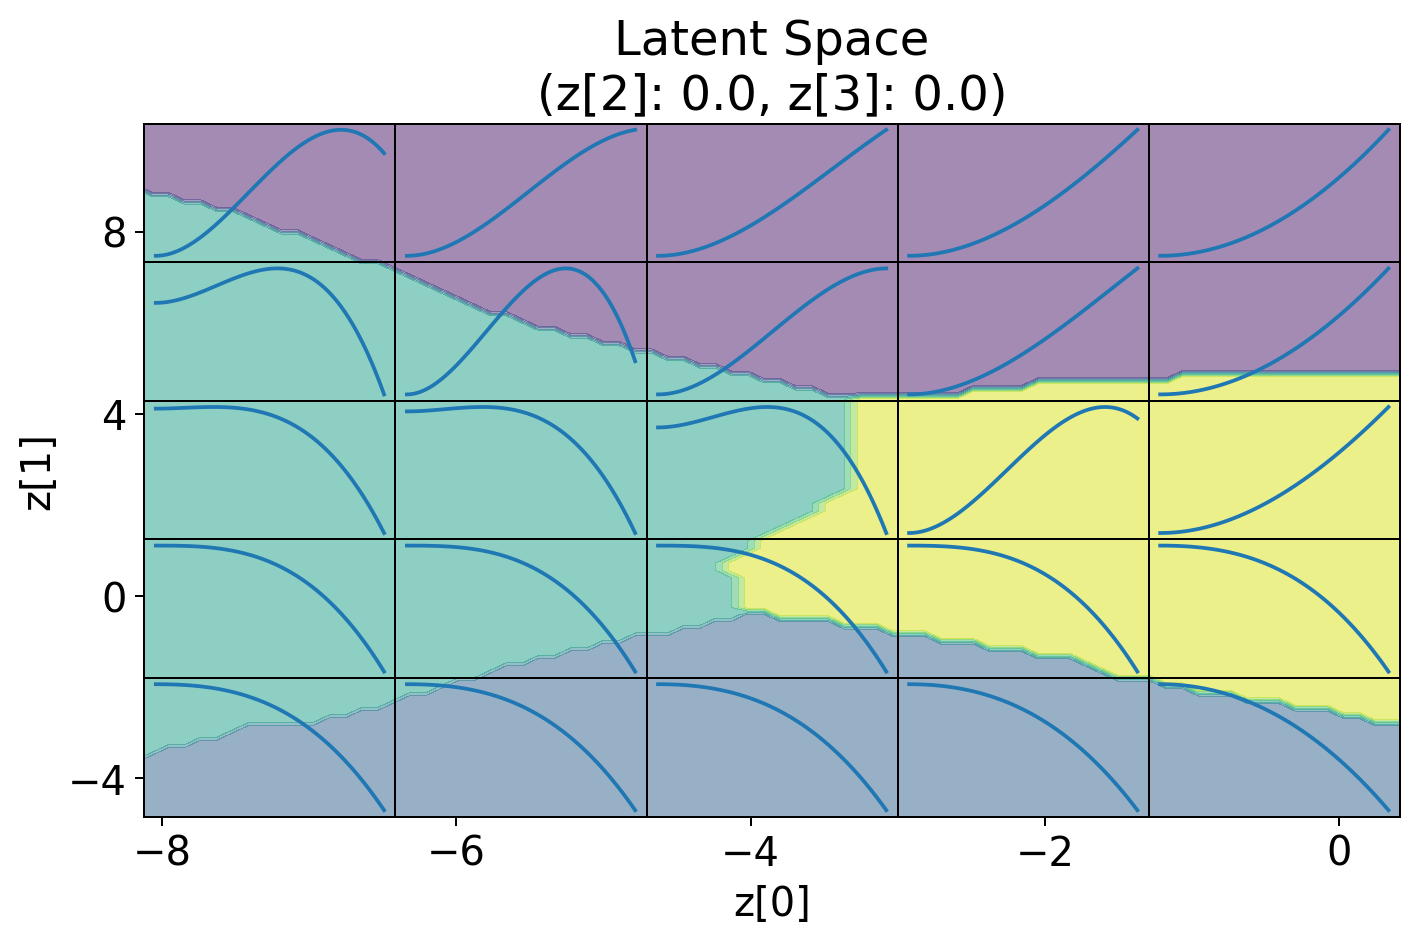

In [17]:
importlib.reload(alvp)

LSE = alvp.LatentSpaceExplorer(
    plot_func='plot',
    subplots_kwargs=None, predict_kwargs=None, plot_func_kwargs=None,
    verbose=1
)

z0 = np.linspace(X_latent[:,0].min()+2,X_latent[:,0].max()-2,5)
z1 = np.linspace(X_latent[:,1].min()+2,X_latent[:,1].max()-2,5)
fig, axs = LSE.generated_2d(
    generator=UnravelLatentspace(),
    z0=z0, z1=z1,
    zi_f=X_latent.shape[1]-2,
    z0_idx=0, z1_idx=1,
    plot_func='plot',
    subplots_kwargs=None, predict_kwargs=None, plot_func_kwargs=None,
    verbose=None
)

LSE.plot_dbe(
    X_latent[:,:2], y,
    res=100, k=1,
    ax=axs[-1],
    contourf_kwargs=None,
)

plt.show()

Look at latent dimensions and generated samples (varying 1 latent variable)

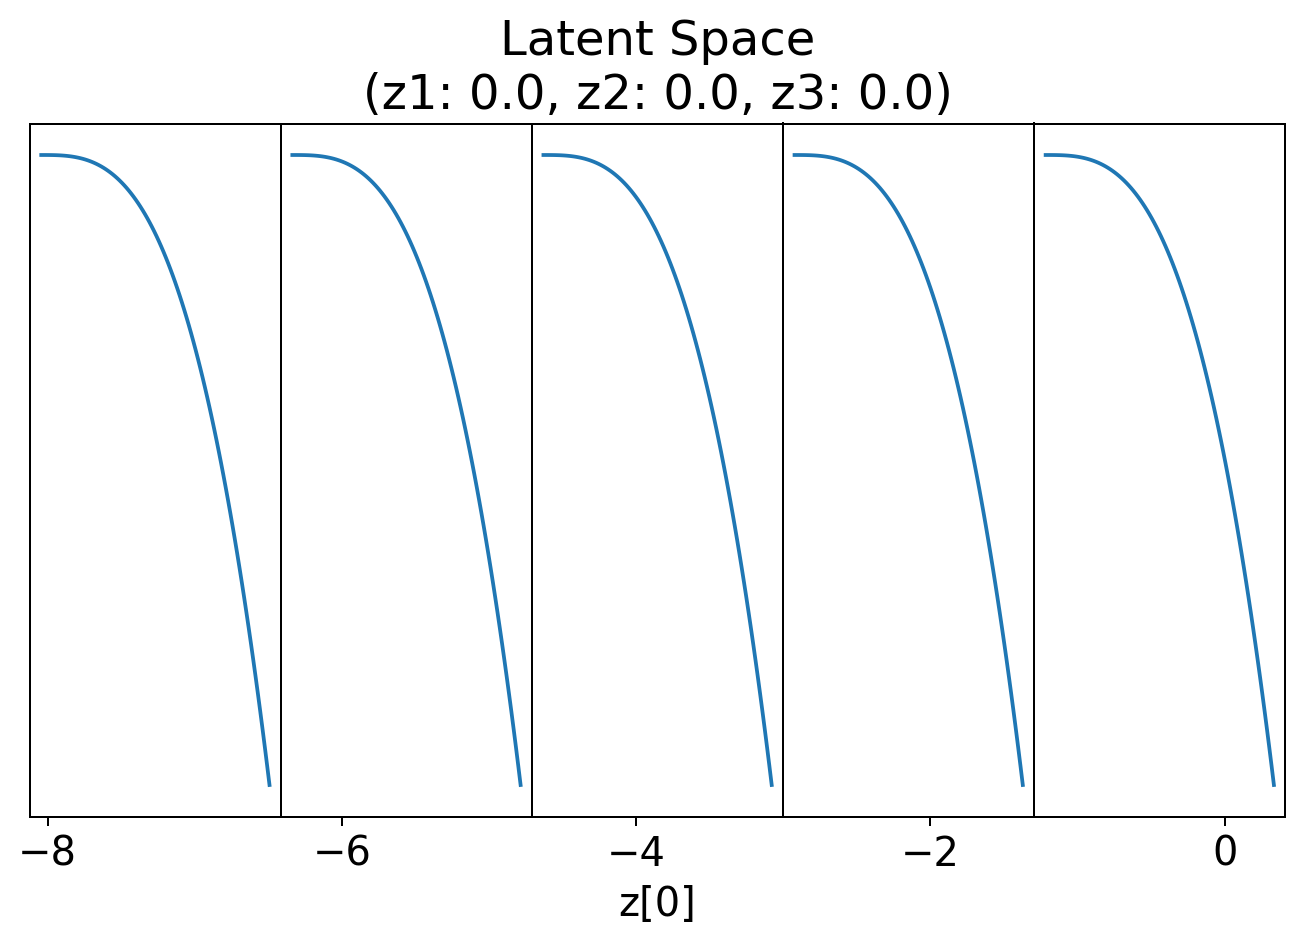

In [18]:
z0 = np.linspace(X_latent[:,0].min()+2,X_latent[:,0].max()-2,5)
fig, axs = LSE.generated_1d(
    generator=UnravelLatentspace(),
    z0=z0,
    zi_f=X_latent.shape[1]-1,
    z0_idx=0,
    plot_func='plot',
    subplots_kwargs=None, predict_kwargs=None, plot_func_kwargs=None,
    verbose=None
)

# Corner Plot

Look at pairwise scatter

(100, 4)
[[ 1.          0.36532774 -0.12708345 -0.20178492]
 [ 0.36532774  1.          0.63747578 -0.85371643]
 [-0.12708345  0.63747578  1.         -0.44946293]
 [-0.20178492 -0.85371643 -0.44946293  1.        ]]


/home/lukas/github/astroLuSt/demos/../astroLuSt/visualization/plots.py:2324: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  if idx != 1:
/home/lukas/github/astroLuSt/demos/../astroLuSt/visualization/plots.py:2320: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  else:
/home/lukas/github/astroLuSt/demos/../astroLuSt/visualization/plots.py:2320: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  else:
/home/lukas/github/astroLuSt/demos/../astroLuSt/visualization/plots.py:2320: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  else:


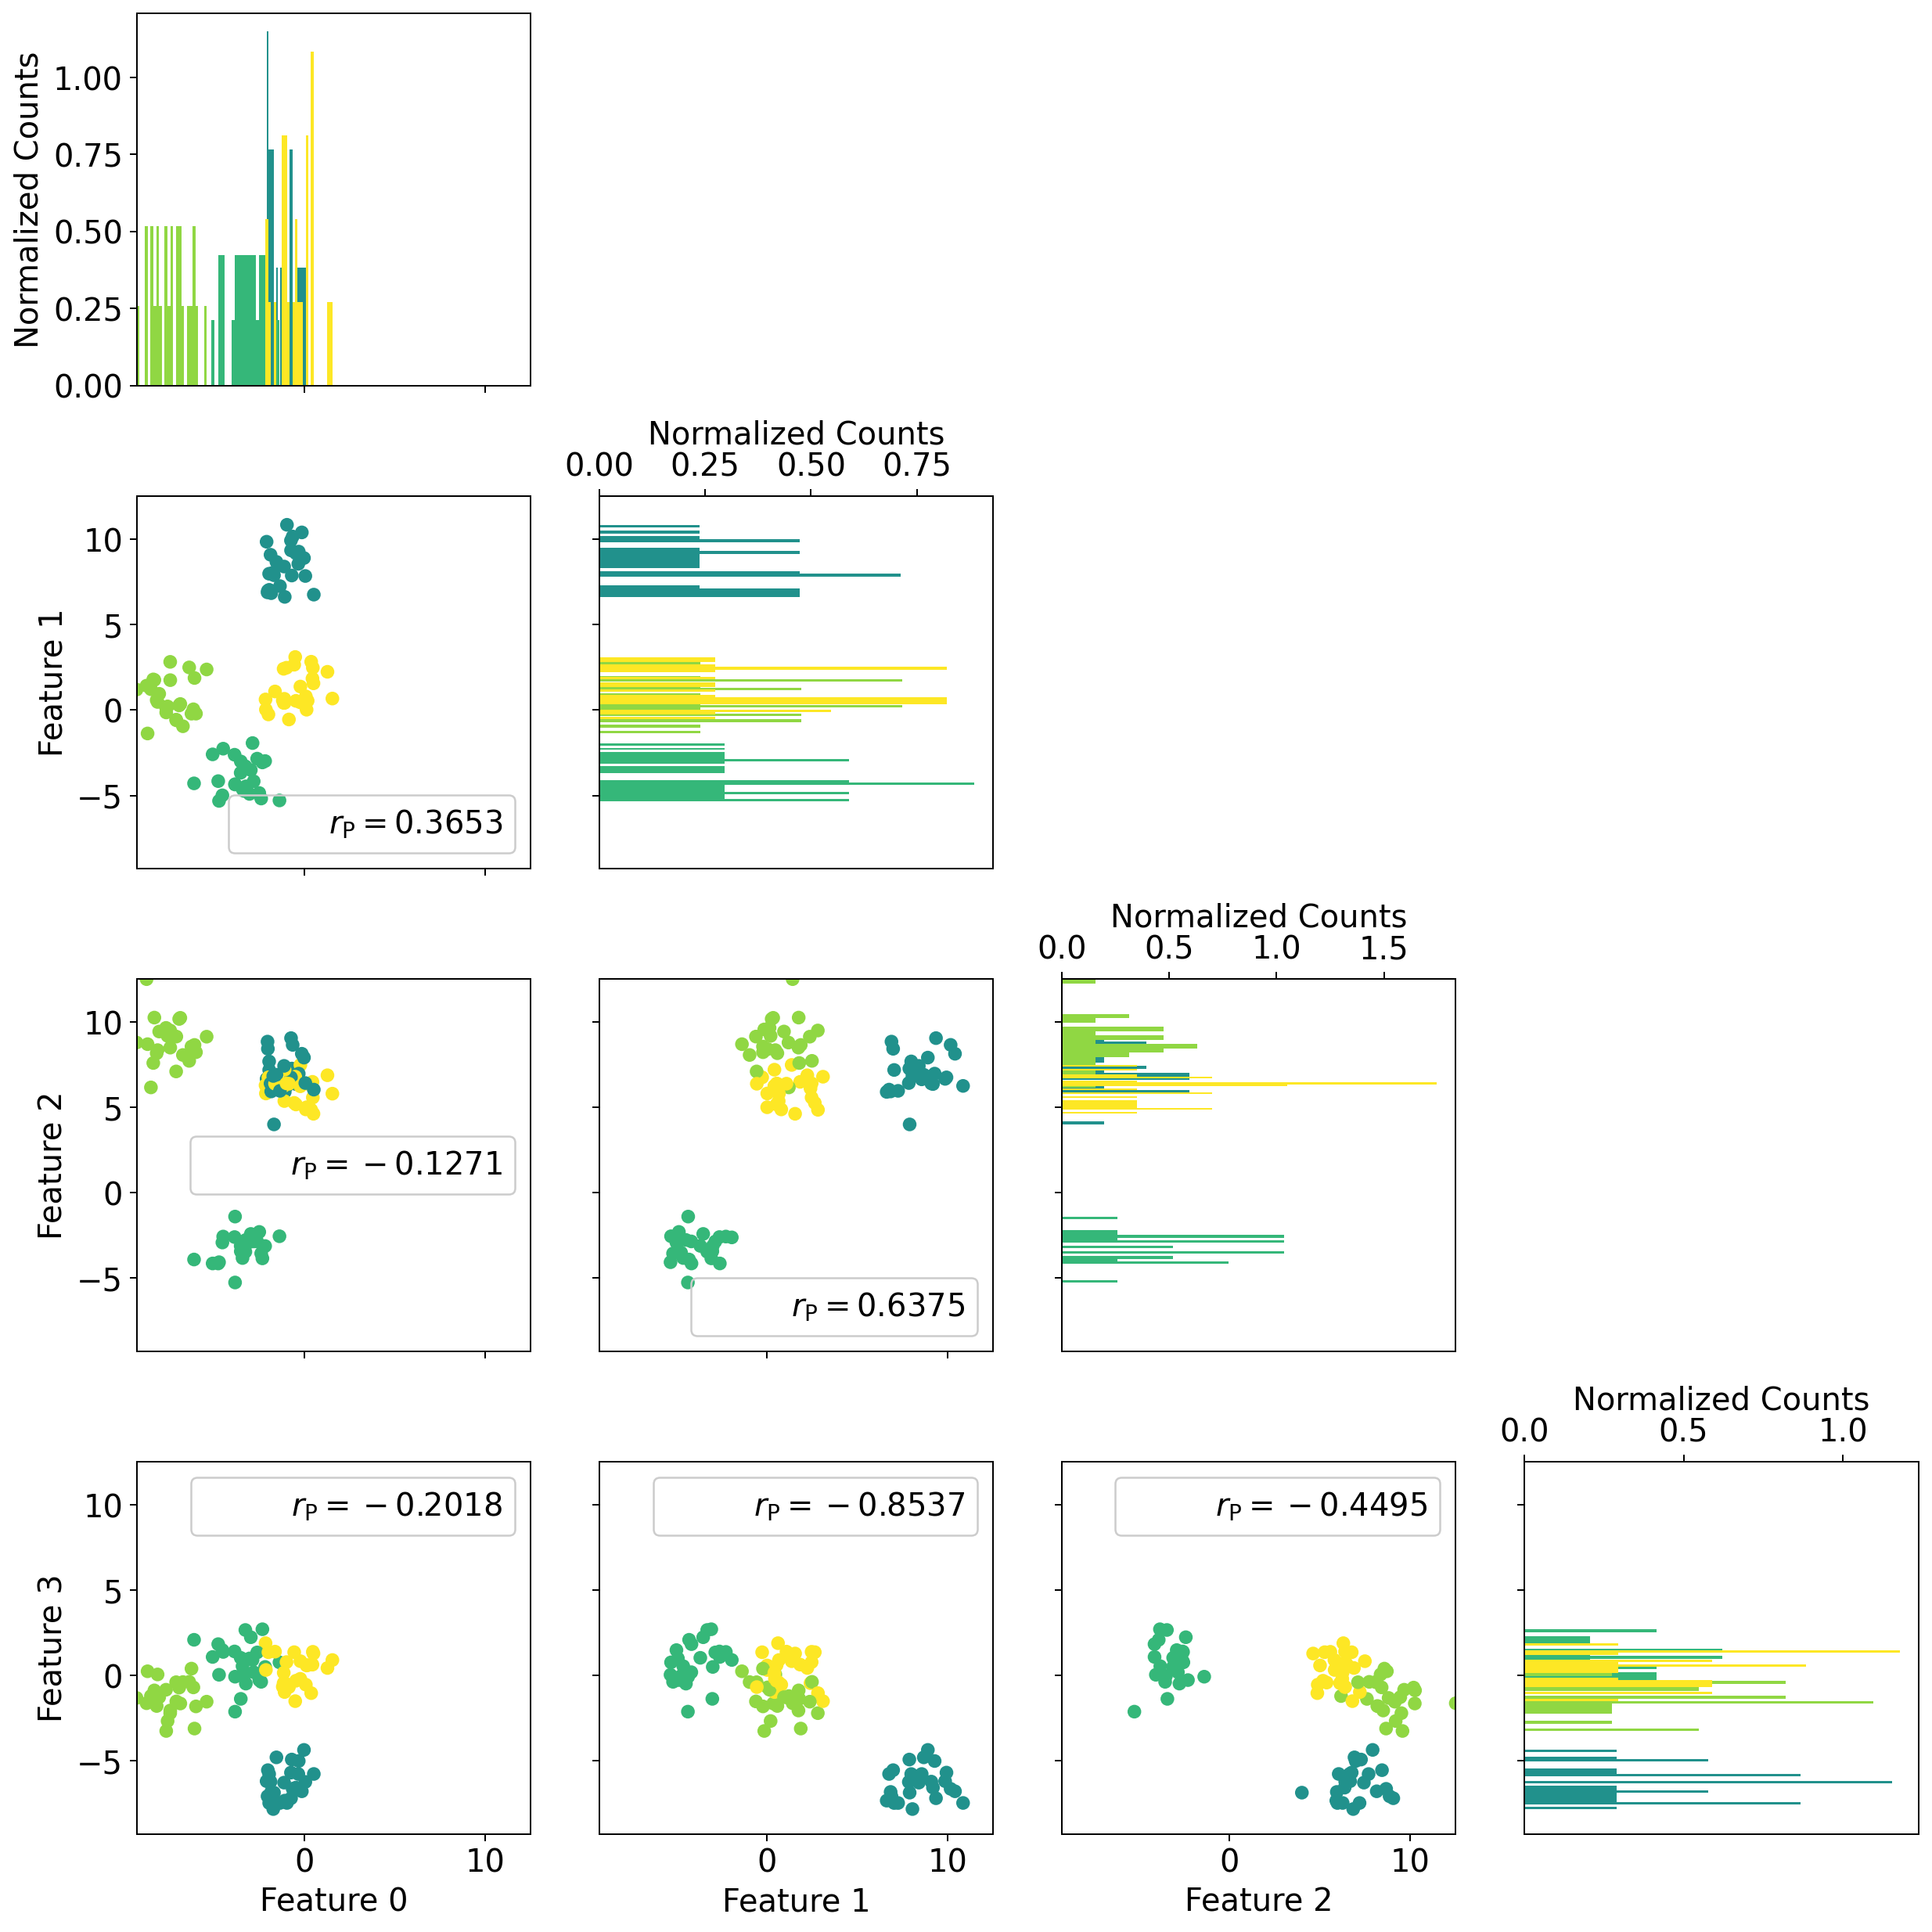

In [67]:
importlib.reload(alvp)


CP = alvp.CornerPlot()

fig = plt.figure(figsize=(14,14))
fig, axs = CP.plot(
    X_latent, y, featurenames=None,
    mus=None, sigmas=None, corrmat=None,
    bins=100,
    cmap='viridis',
    xymin=np.nanmin(X_latent), xymax=np.nanmax(X_latent),
    asstandardnormal=False,
    fig=fig,
    sctr_kwargs={'alpha':1, 'vmin':-3},
    hist_kwargs={'density':True},
)

# Venn Diagram

Visualization of a the following query

\begin{align}
    k_1 \lor (k_2 \land \neg  k_3) \lor (k_4\land k_3)
\end{align}

VennDiagram(
    verbose=2,
)
INFO(VennDiagram.plot): Parsed `query`: (query_array[:,:,3]*query_array[:,:,4])+(query_array[:,:,3]*query_array[:,:,5])+(query_array[:,:,3]*(1-query_array[:,:,6]))


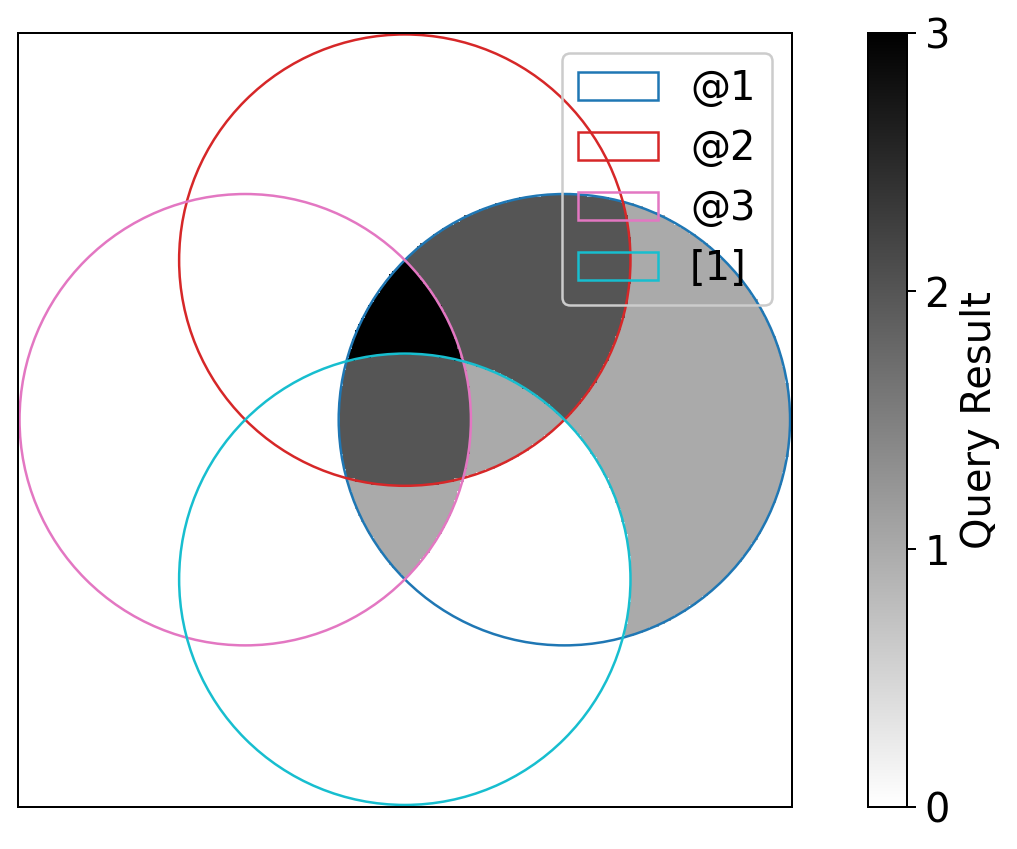

In [10]:
importlib.reload(alvp)

VD = alvp.VennDiagram(verbose=2)

print(VD)

# fig, axs = VD.plot(
#     query='@1|(@2&(~@3))|(@4&@3)',
#     labels=['@1', '@2', '@3'],
#     # pcolormesh_kwargs={'vmax':1}
#     # pcolormesh_kwargs={'vmin':1}
# )
fig, axs = VD.plot(
    query='(@1&@2)|(@1&@3)|(@1&(~@4))',
    labels=['@1', '@2', '@3'],
    # pcolormesh_kwargs={'vmax':1}
    # pcolormesh_kwargs={'vmin':1}
)

plt.show()